Качество алгоритма до нормализации: 0.6444444444444445
Качество алгоритма до нормализации: 0.9333333333333333


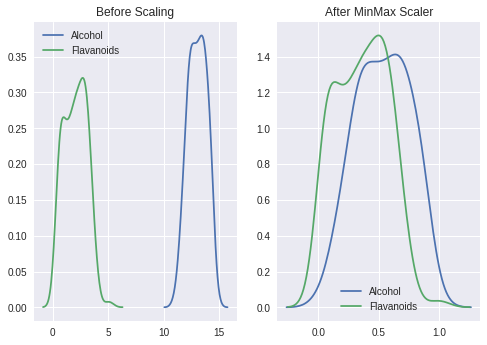

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=2).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train["Alcohol"], ax=ax1)
sns.kdeplot(X_train["Flavanoids"], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled["Alcohol"], ax=ax2)
sns.kdeplot(X_train_scaled["Flavanoids"], ax=ax2)
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.9555555555555556
SGDClassifier 0.9777777777777777
SVC 1.0
GaussianNB 0.9777777777777777
KNeighborsClassifier 0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

a = np.ones(y_test.shape[0])
print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

In [41]:
n_neighbors = 15 #количество соседей
weights = "uniform"


knn = neighbors.KNeighborsClassifier(n_neighbors, weights) #создание модели
knn.fit(X_train_scaled, y_train) #обучение модели
y_knn = knn.predict(X_test_scaled)
y_knn = np.around(y_knn, decimals = 0).astype(np.int64)

scores = cross_val_score(knn, X_test_scaled, y_test) #кросс-валидация
    
#Выводы результатов и метрик
print("Weights = %s" % (weights))
print("Accuracy: %0.2f%% (+/- %0.2f%%)" % (scores.mean() * 100, scores.std() * 2 * 100))
print(classification_report(y_test, y_knn, target_names = ['class 0', 'class 1', 'class 2']))

Weights = uniform
Accuracy: 95.56% (+/- 6.29%)
             precision    recall  f1-score   support

    class 0       0.94      1.00      0.97        15
    class 1       1.00      0.94      0.97        18
    class 2       1.00      1.00      1.00        12

avg / total       0.98      0.98      0.98        45



**Лабораторная работа №2**

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
data.info()

X = data[data.columns[1:]]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


Проведем визуальный анализ наших данных

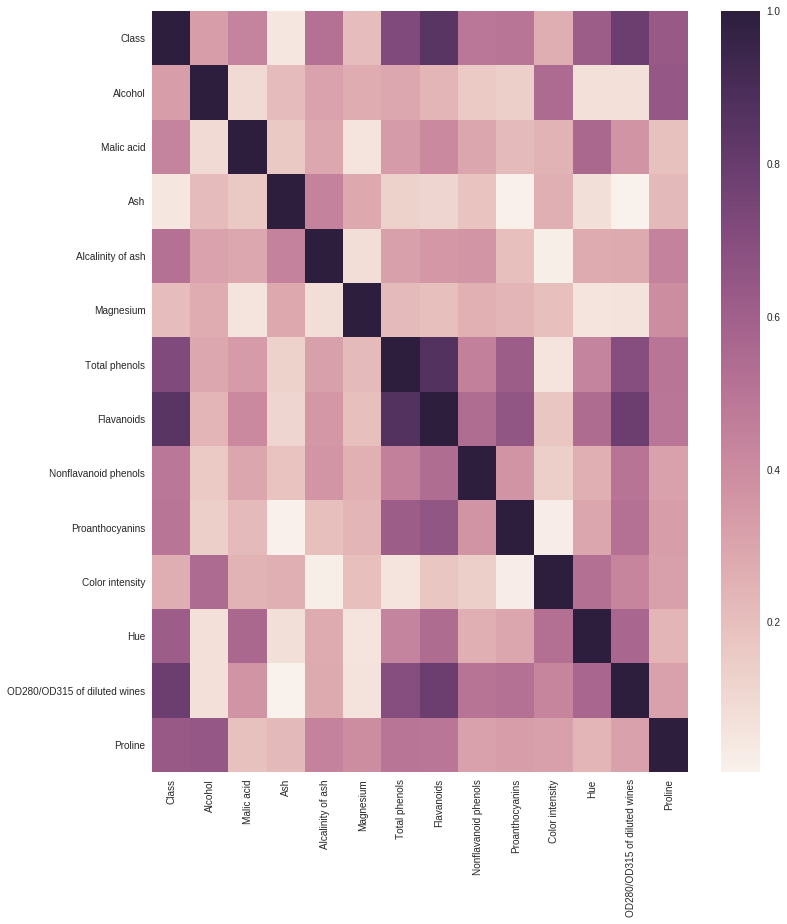

In [44]:
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

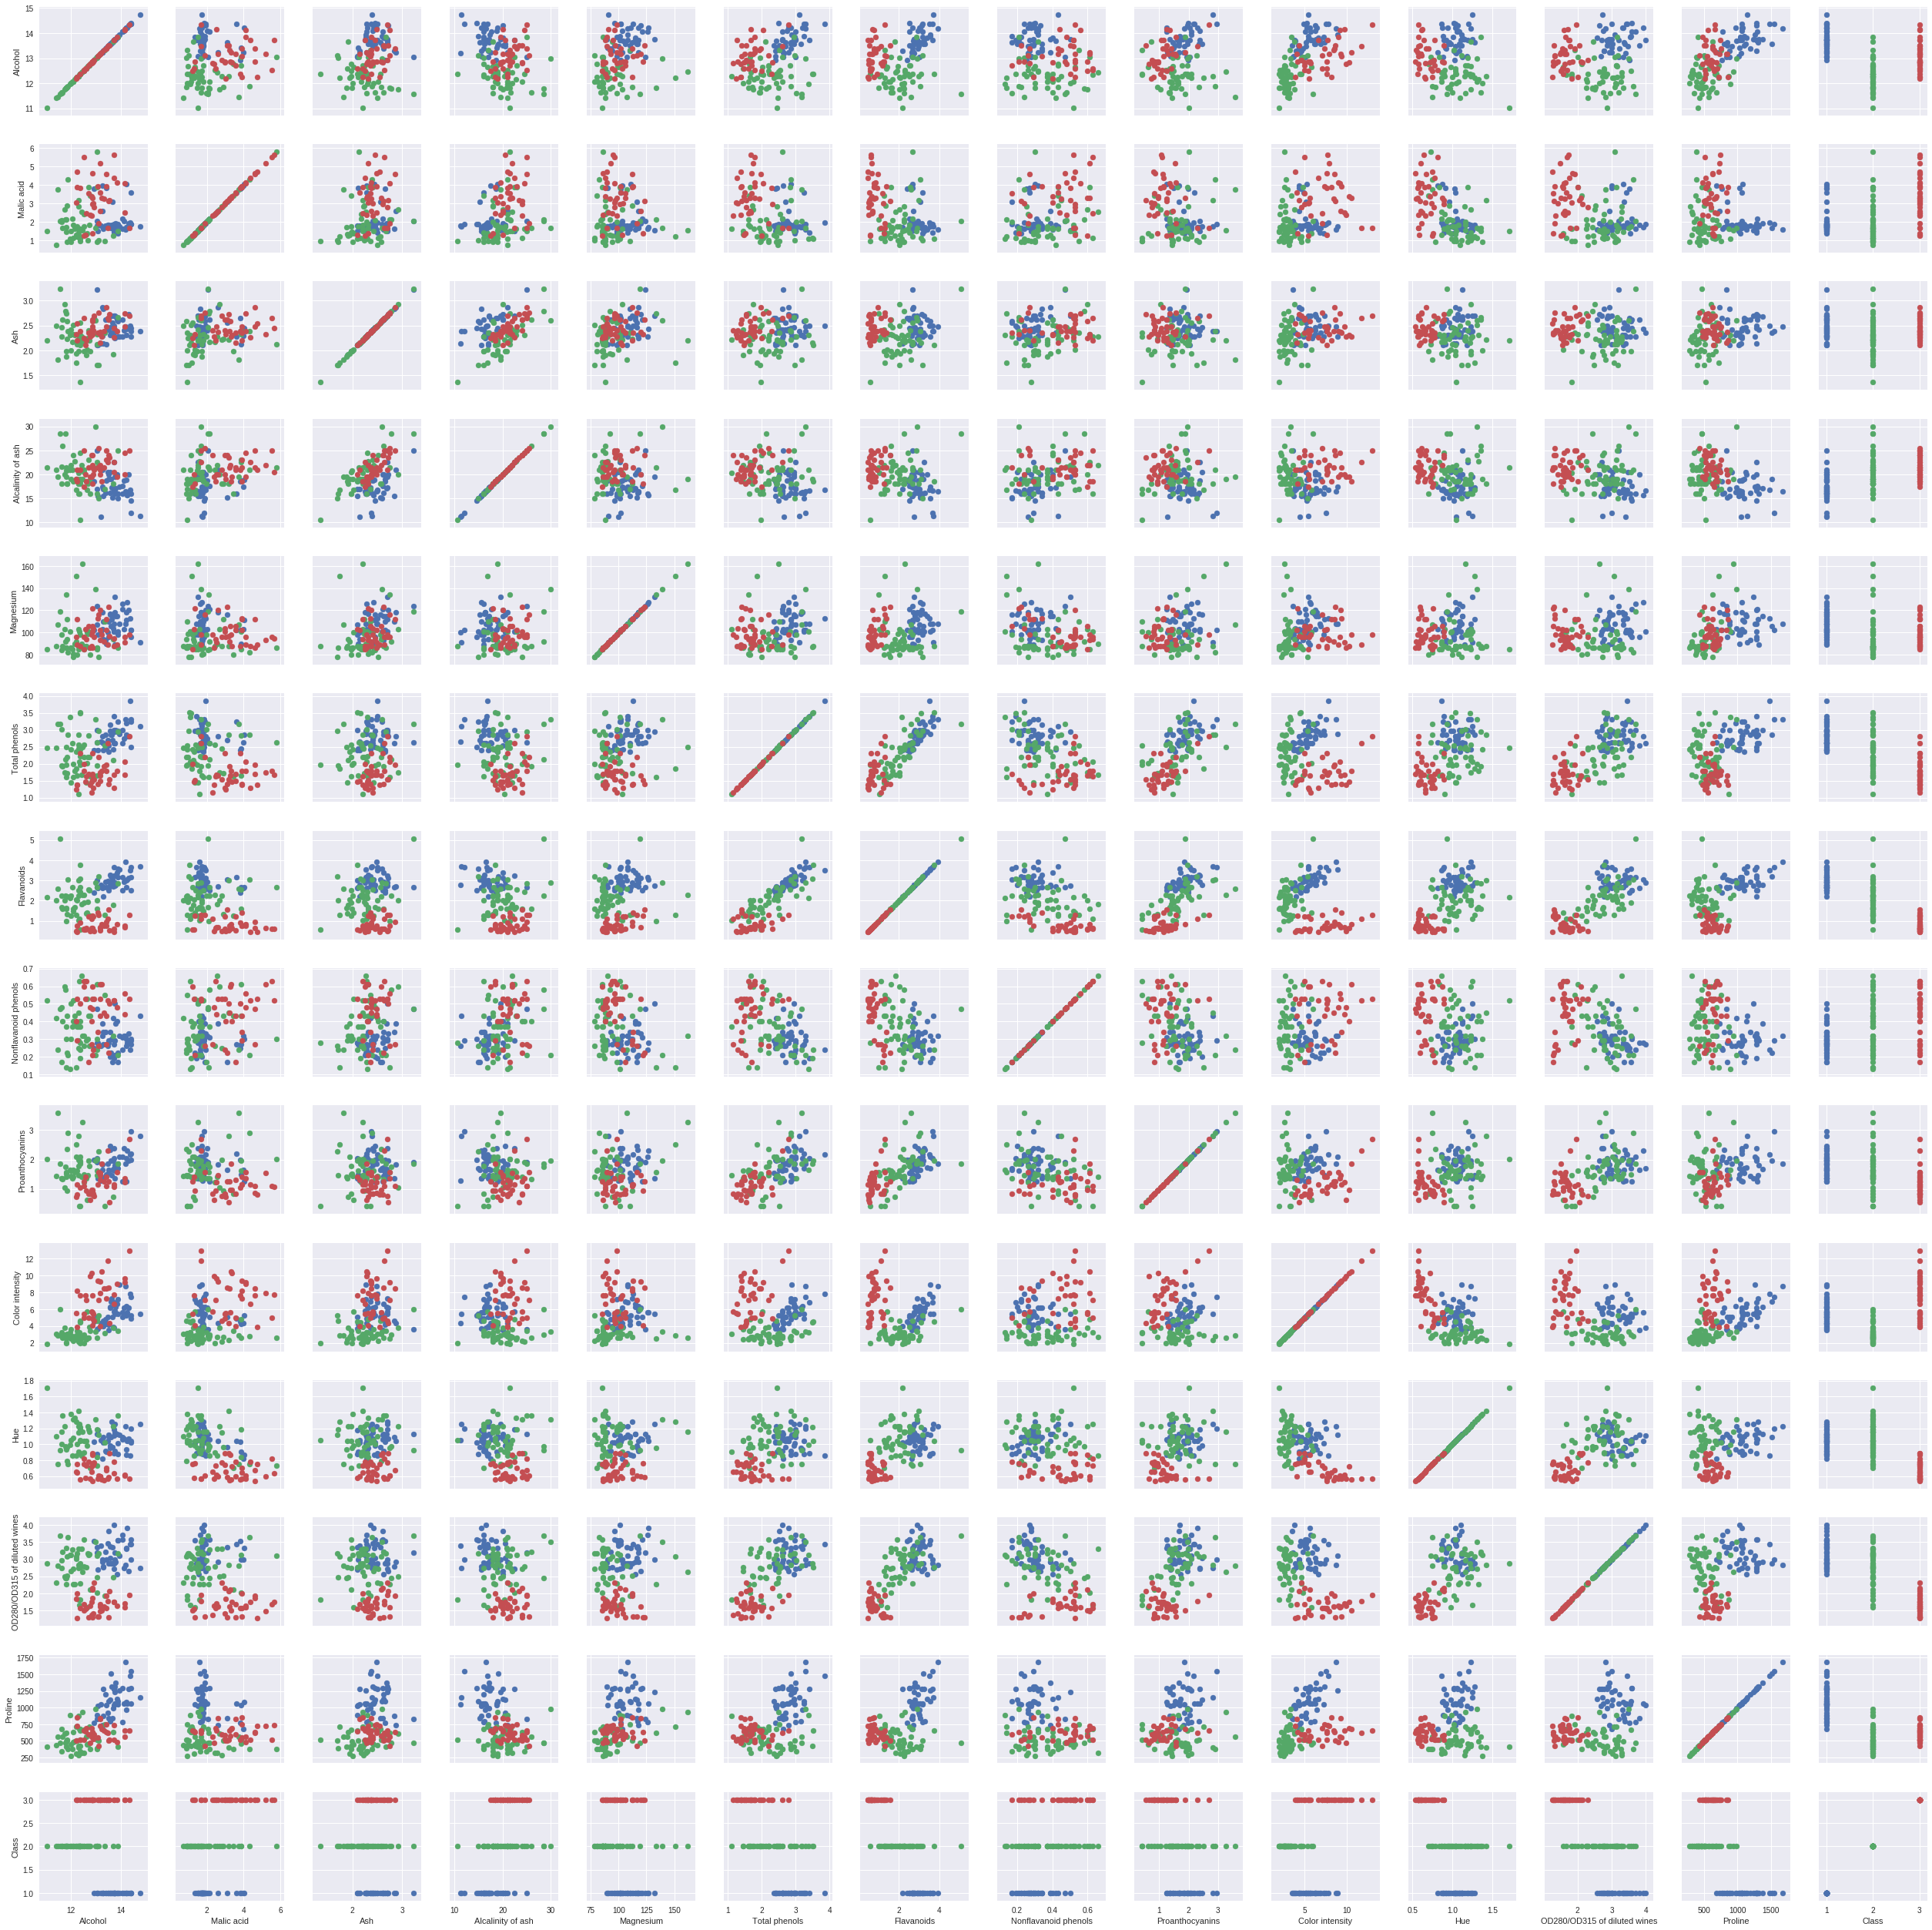

In [43]:
df_for_pairgrid = X_train[["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]]
df_for_pairgrid['Class'] = y_train

sns.PairGrid(df_for_pairgrid, hue='Class').map(plt.scatter)